In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/iris.csv')
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#X = df.iloc[:,3:5].values
X = df[['PetalLength[cm]','PetalWidth[cm]']].values
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [19]:
label_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df['ClassLabel'] = df['Species'].map(label_dict)
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabel
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [27]:
y = df['ClassLabel'].values
y.shape

(150,)

-------------

Shuffle

In [28]:
indices = np.arange(y.shape[0]) #y.shape = (150,) -> y.shape[0]=150
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [29]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [35]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]
X_shuffled[:5]

array([[4.9, 1.5],
       [5.5, 2.1],
       [5.6, 2.2],
       [4.1, 1.3],
       [1.5, 0.1]])

In [36]:
X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:],y_shuffled[105:]

------------

in Sckit-Learn

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X,y=iris.data[:,2:], iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=123, shuffle=True)

In [38]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (105, 2)
y_train.shape: (105,)
X_test.shape: (45, 2)
y_test.shape: (45,)


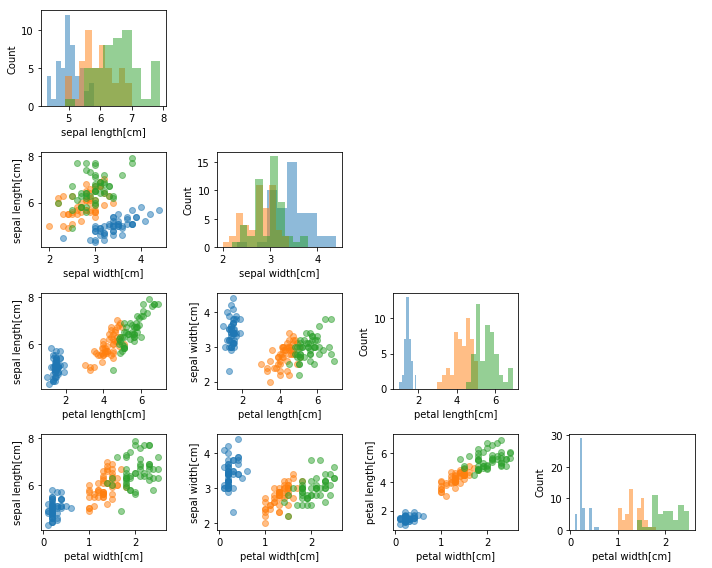

In [59]:
from mlxtend.plotting import scatterplotmatrix

names = ['sepal length[cm]','sepal width[cm]', 'petal length[cm]', 'petal width[cm]']

fig, axes = scatterplotmatrix(iris.data[y==0],figsize=(10,8), alpha = 0.5) #class 0
fig, axes = scatterplotmatrix(iris.data[y==1], fig_axes=(fig,axes), alpha=0.5) #class 1
fig, axes = scatterplotmatrix(iris.data[y==2], fig_axes=(fig,axes), alpha=0.5, names=names) #class_2
#figsize : graph picture size
#fig_axes(fig,axes) : class0,1,2 그래프를 같은 평면에 그린다
#alpha = 투명도

plt.tight_layout()
plt.show()

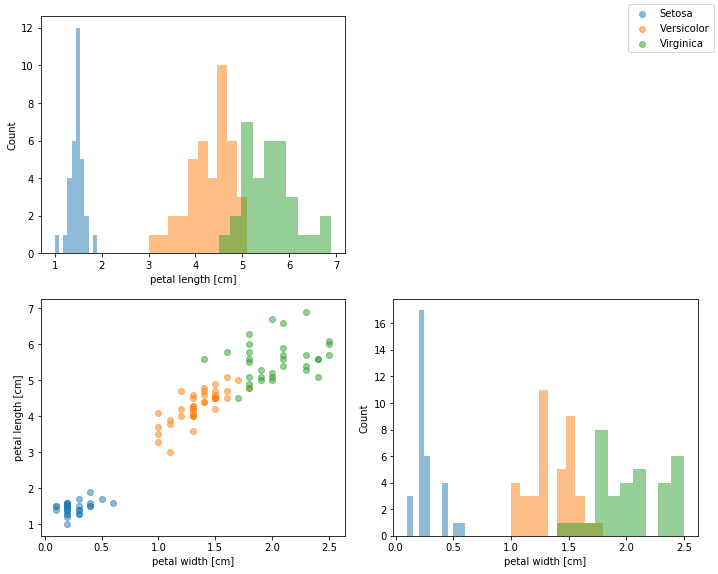

In [61]:
names = ['petal length [cm]', 'petal width [cm]']

fig, axes = scatterplotmatrix(X_train[y_train==0],figsize=(10,8), alpha=0.5, label="Setosa")
fig, axes = scatterplotmatrix(X_train[y_train==1],fig_axes=(fig,axes), alpha=0.5, label="Versicolor")
fig, axes = scatterplotmatrix(X_train[y_train==2],fig_axes=(fig,axes), alpha=0.5, names=names, label="Virginica")
fig.legend()

plt.tight_layout()
plt.show()

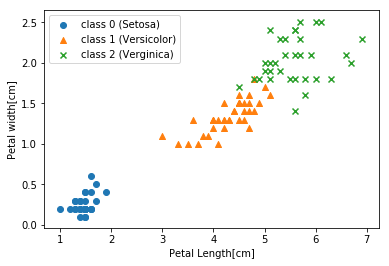

In [62]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], marker='o', label='class 0 (Setosa)')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], marker='^', label='class 1 (Versicolor)')
plt.scatter(X_train[y_train==2,0], X_train[y_train==2,1], marker='x', label='class 2 (Verginica)')

plt.xlabel('Petal Length[cm]')
plt.ylabel('Petal width[cm]')
plt.legend(loc = 'upper left')

plt.show()

--------

kNN Model

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
y_pred = knn_model.predict(X_test)

In [79]:
num_correct_predictions = (y_pred==y_test).sum()
accuracy = (num_correct_predictions/y_test.shape[0])*100
print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 95.56%


In [80]:
print(f'Test sec accuracy: {knn_model.score(X_test,y_test)*100:.2f}%')

Test sec accuracy: 95.56%


-----

Decision boundary

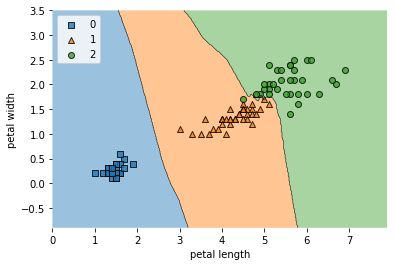

In [81]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train,y_train,knn_model)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

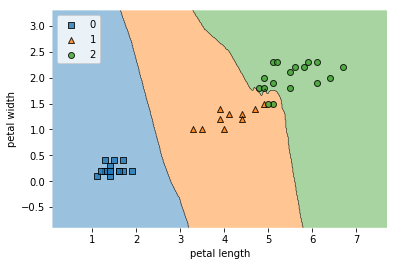

In [82]:
plot_decision_regions(X_test,y_test,knn_model)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()